### Task 2 y 3

In [19]:
import pandas as pd
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter
import string

# Cargar el archivo CSV
df = pd.read_csv('train.csv')

# Función para limpiar el texto
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Eliminar caracteres especiales y signos de puntuación
    text = re.sub(r'\@\w+|\#|\d+', '', text)  # Quitar hashtags, menciones, y números
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Eliminar stopwords
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

# Aplicar la función de limpieza a la columna de texto
df['cleaned_text'] = df['text'].apply(clean_text)

# Separar en tweets de desastres y no desastres
disaster_tweets = df[df['target'] == 1]['cleaned_text']
non_disaster_tweets = df[df['target'] == 0]['cleaned_text']

# Calcular la frecuencia de las palabras
disaster_words = Counter(" ".join(disaster_tweets).split())
non_disaster_words = Counter(" ".join(non_disaster_tweets).split())


### Task 4

In [20]:
# Obtener las palabras más comunes en tweets de desastres
common_disaster_words = disaster_words.most_common(20)
# Obtener las palabras más comunes en tweets que no son de desastres
common_non_disaster_words = non_disaster_words.most_common(20)

# Mostrar resultados
print("Palabras más comunes en tweets de desastres:")
print(common_disaster_words)

print("\nPalabras más comunes en tweets que no son de desastres:")
print(common_non_disaster_words)

Palabras más comunes en tweets de desastres:
[('news', 138), ('disaster', 117), ('california', 111), ('suicide', 110), ('police', 107), ('amp', 107), ('people', 105), ('killed', 93), ('like', 92), ('pm', 89), ('hiroshima', 89), ('just', 86), ('fires', 85), ('storm', 85), ('crash', 84), ('families', 81), ('train', 79), ('emergency', 76), ('buildings', 75), ('bomb', 74)]

Palabras más comunes en tweets que no son de desastres:
[('like', 253), ('im', 243), ('just', 231), ('amp', 193), ('new', 168), ('dont', 141), ('body', 112), ('video', 96), ('people', 90), ('love', 89), ('know', 85), ('time', 84), ('got', 83), ('day', 81), ('emergency', 81), ('going', 75), ('want', 67), ('good', 67), ('think', 66), ('man', 62)]


###  Task 5

In [21]:

# Exploración de bigramas y trigramas
from sklearn.feature_extraction.text import CountVectorizer

# Bigramas
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))
bigrams = bigram_vectorizer.fit_transform(df['cleaned_text'])
bigram_counts = Counter(bigram_vectorizer.get_feature_names_out())

# Trigramas
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3))
trigrams = trigram_vectorizer.fit_transform(df['cleaned_text'])
trigram_counts = Counter(trigram_vectorizer.get_feature_names_out())

print("\nAlgunos bigramas comunes:")
print(bigram_counts.most_common(10))

print("\nAlgunos trigramas comunes:")
print(trigram_counts.most_common(10))


Algunos bigramas comunes:
[('aa ayyo', 1), ('aa batteries', 1), ('aa near', 1), ('aaaa ok', 1), ('aaaaaaallll ûªm', 1), ('aaaaaand theres', 1), ('aampb pipeliners', 1), ('aampw pmclose', 1), ('aan den', 1), ('aannnnd reddit', 1)]

Algunos trigramas comunes:
[('aa ayyo dei', 1), ('aa batteries swear', 1), ('aa near bings', 1), ('aaaa ok lemme', 1), ('aaaaaaallll ûªm season', 1), ('aaaaaand theres thunder', 1), ('aampw pmclose help', 1), ('aan den rijn', 1), ('aannnnd reddit quarantine', 1), ('aar ambulancewe decide', 1)]


### Task 5

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



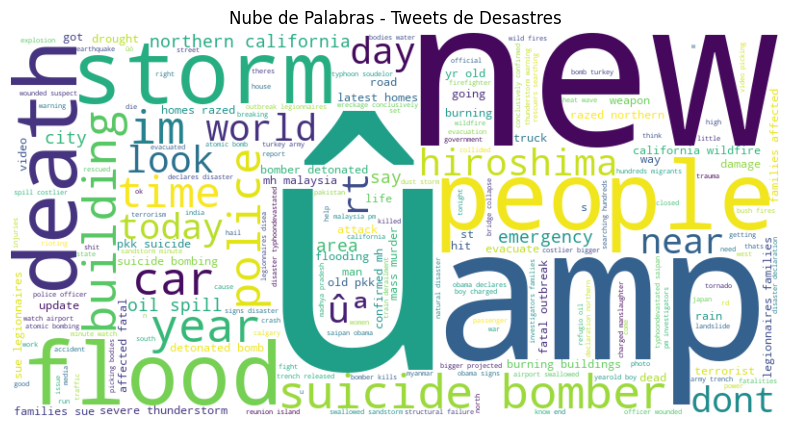

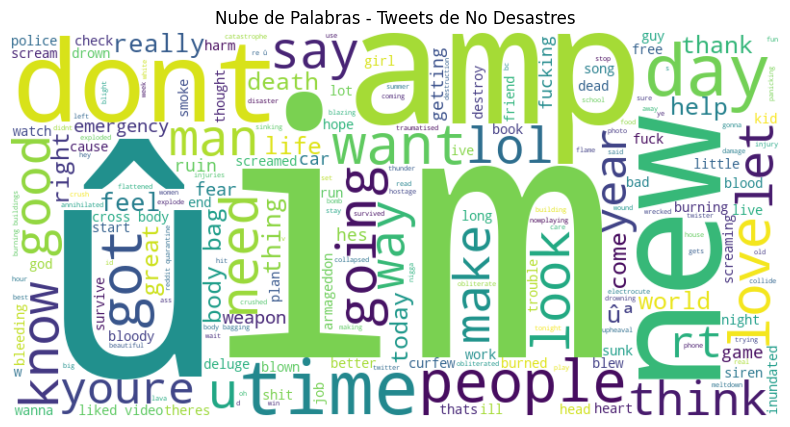

In [22]:
%pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Función para crear y mostrar nubes de palabras
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generar nube de palabras para tweets de desastres
create_wordcloud(" ".join(disaster_tweets), "Nube de Palabras - Tweets de Desastres")

# Generar nube de palabras para tweets que no son de desastres
create_wordcloud(" ".join(non_disaster_tweets), "Nube de Palabras - Tweets de No Desastres")


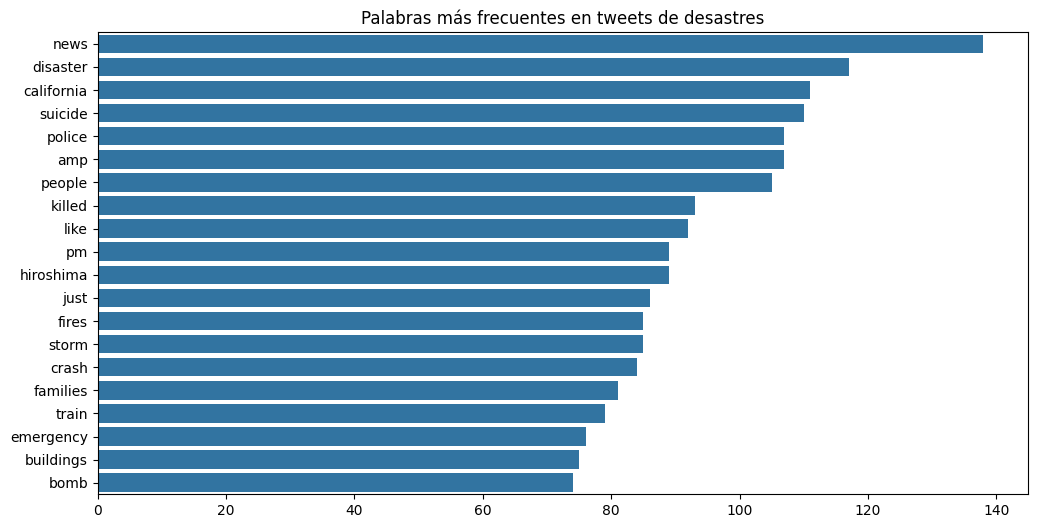

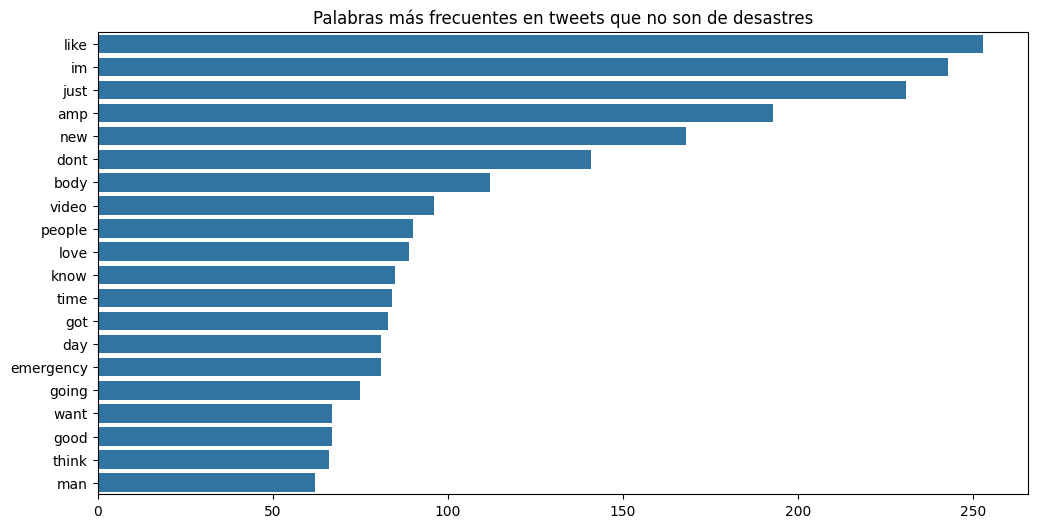

In [23]:
import seaborn as sns

# Función para crear un histograma de las palabras más frecuentes
def plot_word_frequencies(word_freq, title):
    words, counts = zip(*word_freq)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(title)
    plt.show()

# Histograma de las palabras más frecuentes en tweets de desastres
plot_word_frequencies(common_disaster_words, "Palabras más frecuentes en tweets de desastres")

# Histograma de las palabras más frecuentes en tweets que no son de desastres
plot_word_frequencies(common_non_disaster_words, "Palabras más frecuentes en tweets que no son de desastres")


In [24]:
# Bigramas más comunes
bigram_freq = bigrams.sum(axis=0)
bigram_freq = [(word, bigram_freq[0, idx]) for word, idx in bigram_vectorizer.vocabulary_.items()]
bigram_freq = sorted(bigram_freq, key=lambda x: x[1], reverse=True)[:10]

# Trigramas más comunes
trigram_freq = trigrams.sum(axis=0)
trigram_freq = [(word, trigram_freq[0, idx]) for word, idx in trigram_vectorizer.vocabulary_.items()]
trigram_freq = sorted(trigram_freq, key=lambda x: x[1], reverse=True)[:10]

# Mostrar resultados
print("\nBigramas más comunes:")
print(bigram_freq)

print("\nTrigramas más comunes:")
print(trigram_freq)



Bigramas más comunes:
[('burning buildings', 60), ('suicide bomber', 59), ('liked video', 41), ('northern california', 41), ('cross body', 39), ('oil spill', 39), ('suicide bombing', 34), ('california wildfire', 34), ('looks like', 33), ('mass murder', 32)]

Trigramas más comunes:
[('suicide bomber detonated', 30), ('northern california wildfire', 29), ('latest homes razed', 28), ('homes razed northern', 28), ('pkk suicide bomber', 28), ('bomber detonated bomb', 28), ('razed northern california', 27), ('yr old pkk', 27), ('old pkk suicide', 27), ('families sue legionnaires', 26)]


In [25]:
# Palabras comunes entre tweets de desastres y no desastres
common_words = set(disaster_words.keys()).intersection(set(non_disaster_words.keys()))
print(f"Palabras comunes en ambas categorías: {common_words}")


Palabras comunes en ambas categorías: {'todays', 'dental', 'offers', 'arson', 'covered', 'superhero', 'pantherattack', 'tanks', 'sarah', 'golf', 'extensive', 'fkn', 'penalty', 'rubber', 'referring', 'hair', 'spot', 'shanghai', 'entrepreneur', 'drake', 'minor', 'commercial', 'asleep', 'globalwarming', 'details', 'tho', 'ebay', 'afghan', 'plants', 'units', 'hard', 'cnbc', 'scotland', 'demi', 'faced', 'psychiatric', 'werent', 'se', 'fraction', 'documents', 'straight', 'flow', 'profile', 'lakes', 'heartless', 'hillary', 'realized', 'blows', 'text', 'iraq', 'heart', 'scenes', 'syrian', 'coat', 'faulty', 'jonathanferrell', 'holy', 'list', 'dumb', 'values', 'common', 'tool', 'australian', 'rly', 'homes', 'age', 'posts', 'likely', 'denial', 'belongs', 'aliens', 'rubble', 'images', 'fb', 'burn', 'wi', 'houses', 'david', 'headquarters', 'caution', 'error', 'gps', 'wildfire', 'apparently', 'battery', 'tons', 'wo', 'bites', 'flying', 'h', 'k', 'sf', 'pass', 'epic', 'post', 'rescue', 'emmerdale', '

### Task 6

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorización del texto utilizando TF-IDF con un rango de bigramas y trigramas
vectorizer = TfidfVectorizer(ngram_range=(1, 3), stop_words='english')
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['target']

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Modelo de Regresión Logística
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Regresión Logística:")
print(classification_report(y_test, y_pred_lr))

# Modelo Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes:")
print(classification_report(y_test, y_pred_nb))

# Modelo Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))


Regresión Logística:
              precision    recall  f1-score   support

           0       0.72      0.96      0.83       874
           1       0.91      0.51      0.65       649

    accuracy                           0.77      1523
   macro avg       0.82      0.73      0.74      1523
weighted avg       0.80      0.77      0.75      1523

Naive Bayes:
              precision    recall  f1-score   support

           0       0.76      0.93      0.83       874
           1       0.86      0.60      0.70       649

    accuracy                           0.79      1523
   macro avg       0.81      0.76      0.77      1523
weighted avg       0.80      0.79      0.78      1523

Random Forest:
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       874
           1       0.84      0.57      0.68       649

    accuracy                           0.77      1523
   macro avg       0.79      0.74      0.75      1523
weighted avg       0.78  

### Task 7

In [29]:
def classify_tweet(tweet, model, vectorizer):
    # Preprocesamiento del tweet
    cleaned_tweet = clean_text(tweet)
    tweet_vector = vectorizer.transform([cleaned_tweet])
    
    # Predicción
    prediction = model.predict(tweet_vector)
    
    # Retornar el resultado
    return "Desastre" if prediction[0] == 1 else "No Desastre"

# Ejemplo de uso
tweet = "Just witnessed a terrible accident burning buildings"
result = classify_tweet(tweet, rf, vectorizer)
print(f"El tweet '{tweet}' se clasifica como: {result}")

El tweet 'Just witnessed a terrible accident burning buildings' se clasifica como: Desastre
